# 逻辑回归中使用正则化

在多项式回归中，使用$J(\theta)+\alpha L_2$ 或者$J(\theta)+\alpha L_1$来正则化

在逻辑回归中我们可以使用$C \cdot J(\theta) + L_2$ 或者$C \cdot J(\theta)+L_1$来正则化

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:,0]**2 + X[:,1] < 1.5, dtype=int)

for _ in range(20):
    y[np.random.randint(200)] = 1

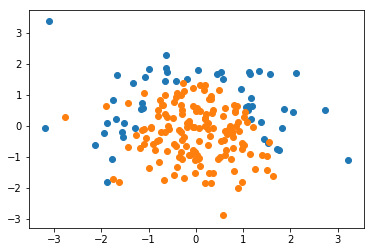

In [2]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

### 使用scikit-learn中的逻辑回归

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
log_reg.score(X_train, y_train)

0.7933333333333333

In [6]:
log_reg.score(X_test, y_test)

0.86

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100 )).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100 )).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    custom_camp = ListedColormap(['#EF9A9A', '#FFF59F', '#90CAF9'])
    plt.contourf(x0, x1, zz, cmap=custom_camp)

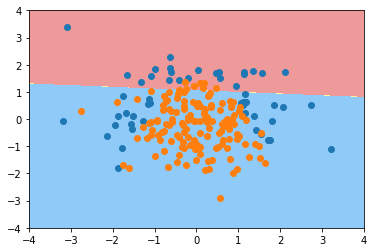

In [8]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

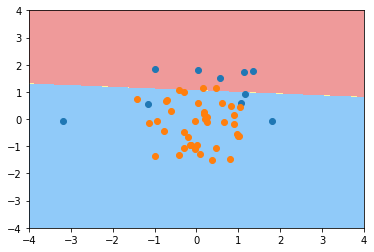

In [9]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1])
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1])
plt.show()

#### 引入多项式

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("log_reg", LogisticRegression())
    ])

In [11]:
poly2_log_reg = PolynomialLogisticRegression(2)
poly2_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [12]:
poly2_log_reg.score(X_train, y_train)

0.9133333333333333

In [13]:
poly2_log_reg.score(X_test, y_test)

0.94

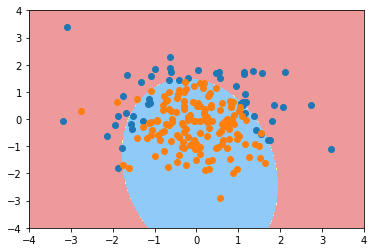

In [14]:
plot_decision_boundary(poly2_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [15]:
poly20_log_reg = PolynomialLogisticRegression(20)
poly20_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [16]:
poly20_log_reg.score(X_train, y_train)

0.94

In [17]:
poly20_log_reg.score(X_test, y_test)

0.92

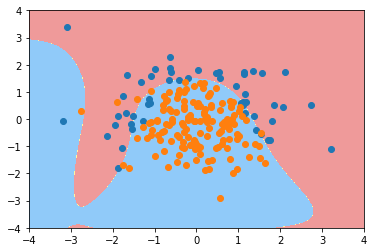

In [18]:
plot_decision_boundary(poly20_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [19]:
def PolynomialLogisticRegression(degree, C):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("log_reg", LogisticRegression(C=C))
    ])

In [20]:
poly20_01_log_reg = PolynomialLogisticRegression(20, 0.1)
poly20_01_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [21]:
poly20_01_log_reg.score(X_train, y_train)

0.8533333333333334

In [22]:
poly20_01_log_reg.score(X_test, y_test)

0.92

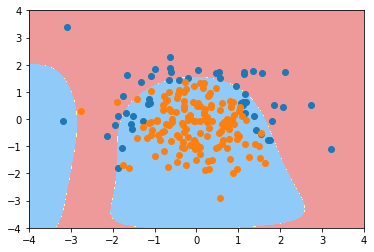

In [23]:
plot_decision_boundary(poly20_01_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [24]:
def PolynomialLogisticRegression(degree, C, penalty='l2'):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("log_reg", LogisticRegression(C=C, penalty=penalty))
    ])

In [25]:
poly20_01_l1_log_reg = PolynomialLogisticRegression(20, 0.1, 'l1')
poly20_01_l1_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [26]:
poly20_01_l1_log_reg.score(X_train, y_train)

0.8266666666666667

In [27]:
poly20_01_l1_log_reg.score(X_test, y_test)

0.9

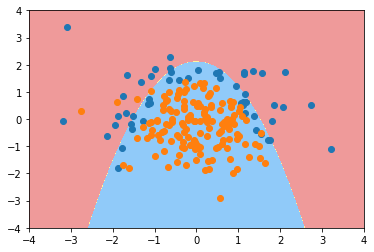

In [28]:
plot_decision_boundary(poly20_01_l1_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()